In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS
from neuralforecast.losses.pytorch import DistributionLoss
from neuralforecast.utils import AirPassengersPanel, AirPassengersStatic

In [3]:
from darts.models import NHiTSModel
model = NHiTSModel.load("./model_results/Gram dal/AS/nhits.pkt")

/home/mukundan/learning/ai_ml/sih_2024_project/sih_2024/.venv/lib/python3.12/site-packages/darts/models/forecasting/torch_forecasting_model.py:1747: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

In [40]:
pr = model.predict(100)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [41]:
type(pr)

darts.timeseries.TimeSeries

In [42]:
import plotly.express as px

In [43]:
df = pr.pd_dataframe().reset_index()

In [48]:
df

component,ds,y
0,2019-05-13,5845.669165
1,2019-05-14,5830.936879
2,2019-05-15,5834.355001
3,2019-05-16,5862.698190
4,2019-05-17,5864.721968
...,...,...
95,2019-08-16,6202.764467
96,2019-08-17,6172.644701
97,2019-08-18,6111.527096
98,2019-08-19,6128.785506


In [49]:
df.ds.min()

Timestamp('2019-05-13 00:00:00')

In [45]:
pr.time_index

DatetimeIndex(['2019-05-13', '2019-05-14', '2019-05-15', '2019-05-16',
               '2019-05-17', '2019-05-18', '2019-05-19', '2019-05-20',
               '2019-05-21', '2019-05-22', '2019-05-23', '2019-05-24',
               '2019-05-25', '2019-05-26', '2019-05-27', '2019-05-28',
               '2019-05-29', '2019-05-30', '2019-05-31', '2019-06-01',
               '2019-06-02', '2019-06-03', '2019-06-04', '2019-06-05',
               '2019-06-06', '2019-06-07', '2019-06-08', '2019-06-09',
               '2019-06-10', '2019-06-11', '2019-06-12', '2019-06-13',
               '2019-06-14', '2019-06-15', '2019-06-16', '2019-06-17',
               '2019-06-18', '2019-06-19', '2019-06-20', '2019-06-21',
               '2019-06-22', '2019-06-23', '2019-06-24', '2019-06-25',
               '2019-06-26', '2019-06-27', '2019-06-28', '2019-06-29',
               '2019-06-30', '2019-07-01', '2019-07-02', '2019-07-03',
               '2019-07-04', '2019-07-05', '2019-07-06', '2019-07-07',
      

In [46]:
px.line(x=df.ds,y=df.y)

In [13]:
print(x)

<TimeSeries (DataArray) (ds: 10, component: 1, sample: 1)> Size: 80B
array([[[5845.66916526]],

       [[5830.93687906]],

       [[5834.35500061]],

       [[5862.69818983]],

       [[5864.721968  ]],

       [[5913.34354008]],

       [[5901.23424356]],

       [[5949.72463843]],

       [[5915.59288388]],

       [[5929.16387931]]])
Coordinates:
  * ds         (ds) datetime64[ns] 80B 2019-05-13 2019-05-14 ... 2019-05-22
  * component  (component) object 8B 'y'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


In [2]:
AirPassengersPanel.head()

,unique_id,ds,y,trend,y_[lag12]
0,Airline1,1949-01-31,112.0,0,112.0
1,Airline1,1949-02-28,118.0,1,118.0
2,Airline1,1949-03-31,132.0,2,132.0
3,Airline1,1949-04-30,129.0,3,129.0
4,Airline1,1949-05-31,121.0,4,121.0


In [3]:
AirPassengersPanel.shape

(288, 5)

In [4]:
Y_train_df = AirPassengersPanel[AirPassengersPanel.ds<AirPassengersPanel['ds'].values[-12]] # 132 train
Y_train_df.shape

(264, 5)

In [5]:
Y_train_df.head(150)

,unique_id,ds,y,trend,y_[lag12]
0,Airline1,1949-01-31,112.0,0,112.0
1,Airline1,1949-02-28,118.0,1,118.0
2,Airline1,1949-03-31,132.0,2,132.0
3,Airline1,1949-04-30,129.0,3,129.0
4,Airline1,1949-05-31,121.0,4,121.0
...,...,...,...,...,...
157,Airline2,1950-02-28,426.0,157,418.0
158,Airline2,1950-03-31,441.0,158,432.0
159,Airline2,1950-04-30,435.0,159,429.0
160,Airline2,1950-05-31,425.0,160,421.0


In [6]:
Y_train_df.tail()

,unique_id,ds,y,trend,y_[lag12]
271,Airline2,1959-08-31,859.0,271,805.0
272,Airline2,1959-09-30,763.0,272,704.0
273,Airline2,1959-10-31,707.0,273,659.0
274,Airline2,1959-11-30,662.0,274,610.0
275,Airline2,1959-12-31,705.0,275,637.0


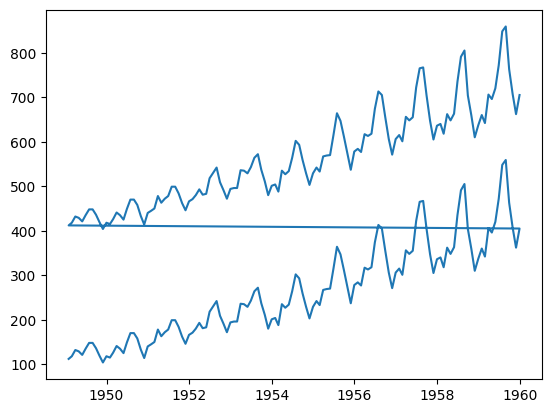

In [7]:
test_df = Y_train_df.reset_index().set_index("ds")
plt.plot(test_df['y'])

In [8]:
Y_test_df = AirPassengersPanel[AirPassengersPanel.ds>=AirPassengersPanel['ds'].values[-12]].reset_index(drop=True) # 12 test
Y_test_df.shape

(24, 5)

In [9]:
Y_test_df.head(24)

,unique_id,ds,y,trend,y_[lag12]
0,Airline1,1960-01-31,417.0,132,360.0
1,Airline1,1960-02-29,391.0,133,342.0
2,Airline1,1960-03-31,419.0,134,406.0
3,Airline1,1960-04-30,461.0,135,396.0
4,Airline1,1960-05-31,472.0,136,420.0
5,Airline1,1960-06-30,535.0,137,472.0
6,Airline1,1960-07-31,622.0,138,548.0
7,Airline1,1960-08-31,606.0,139,559.0
8,Airline1,1960-09-30,508.0,140,463.0
9,Airline1,1960-10-31,461.0,141,407.0


In [10]:
AirPassengersStatic

,unique_id,airline1,airline2
0,Airline1,0,1
1,Airline2,1,0


In [11]:
model = NBEATS(h=12, input_size=24,
               loss=DistributionLoss(distribution='Poisson', level=[80, 90]),
               stack_types = ['identity', 'trend', 'seasonality'],
               max_steps=100,
               val_check_steps=10,
               early_stop_patience_steps=2)

fcst = NeuralForecast(
    models=[model],
    freq='M'
)
# fcst.fit(df=Y_train_df, static_df=AirPassengersStatic, val_size=12)
fcst.fit(df=Y_train_df, val_size=12)
forecasts = fcst.predict(futr_df=Y_test_df)

Seed set to 1
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
2024-10-03 05:31:12.045624: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-03 05:31:12.073690: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-03 05:31:12.081980: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-03 05:31:12.103069: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in ot

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

/home/mukundan/learning/ai_ml/sih_2024_project/sih_2024/sihvenv/lib/python3.12/site-packages/utilsforecast/processing.py:384: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/home/mukundan/learning/ai_ml/sih_2024_project/sih_2024/sihvenv/lib/python3.12/site-packages/utilsforecast/processing.py:438: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/home/mukundan/learning/ai_ml/sih_2024_project/sih_2024/sihvenv/lib/python3.12/site-packages/neuralforecast/core.py:210: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [12]:
forecasts.head(10)

,ds,NBEATS,NBEATS-median,NBEATS-lo-90,NBEATS-lo-80,NBEATS-hi-80,NBEATS-hi-90
unique_id,,,,,,,
Airline1,1960-01-31,432.431000,433.0,396.950012,405.000000,459.0,467.000000
Airline1,1960-02-29,443.500000,443.0,410.000000,417.000000,470.0,478.000000
Airline1,1960-03-31,449.898010,450.0,415.000000,423.000000,479.0,485.000000
Airline1,1960-04-30,452.475006,452.0,416.950012,424.000000,479.0,486.000000
Airline1,1960-05-31,484.932007,485.0,450.000000,457.000000,514.0,523.000000
Airline1,1960-06-30,560.536987,561.0,523.950012,531.000000,589.0,597.049988
Airline1,1960-07-31,634.468018,634.0,592.000000,601.000000,667.0,678.000000
Airline1,1960-08-31,634.809021,634.5,596.000000,604.000000,666.0,673.049988
Airline1,1960-09-30,547.687012,547.0,509.000000,519.900024,578.0,588.000000


In [13]:
Y_test_df.head()

,unique_id,ds,y,trend,y_[lag12]
0,Airline1,1960-01-31,417.0,132,360.0
1,Airline1,1960-02-29,391.0,133,342.0
2,Airline1,1960-03-31,419.0,134,406.0
3,Airline1,1960-04-30,461.0,135,396.0
4,Airline1,1960-05-31,472.0,136,420.0


In [14]:
Y_hat_df = forecasts.reset_index(drop=False).drop(columns=['unique_id','ds'])

In [15]:
Y_hat_df.head()

,NBEATS,NBEATS-median,NBEATS-lo-90,NBEATS-lo-80,NBEATS-hi-80,NBEATS-hi-90
0,432.431000,433.0,396.950012,405.0,459.0,467.0
1,443.500000,443.0,410.000000,417.0,470.0,478.0
2,449.898010,450.0,415.000000,423.0,479.0,485.0
3,452.475006,452.0,416.950012,424.0,479.0,486.0
4,484.932007,485.0,450.000000,457.0,514.0,523.0


In [16]:
Y_test_df.head()

,unique_id,ds,y,trend,y_[lag12]
0,Airline1,1960-01-31,417.0,132,360.0
1,Airline1,1960-02-29,391.0,133,342.0
2,Airline1,1960-03-31,419.0,134,406.0
3,Airline1,1960-04-30,461.0,135,396.0
4,Airline1,1960-05-31,472.0,136,420.0


In [17]:
plot_df = pd.concat([Y_test_df, Y_hat_df], axis=1)
plot_df.head()

,unique_id,ds,y,trend,y_[lag12],NBEATS,NBEATS-median,NBEATS-lo-90,NBEATS-lo-80,NBEATS-hi-80,NBEATS-hi-90
0,Airline1,1960-01-31,417.0,132,360.0,432.431000,433.0,396.950012,405.0,459.0,467.0
1,Airline1,1960-02-29,391.0,133,342.0,443.500000,443.0,410.000000,417.0,470.0,478.0
2,Airline1,1960-03-31,419.0,134,406.0,449.898010,450.0,415.000000,423.0,479.0,485.0
3,Airline1,1960-04-30,461.0,135,396.0,452.475006,452.0,416.950012,424.0,479.0,486.0
4,Airline1,1960-05-31,472.0,136,420.0,484.932007,485.0,450.000000,457.0,514.0,523.0


In [18]:
Y_train_df.head()

,unique_id,ds,y,trend,y_[lag12]
0,Airline1,1949-01-31,112.0,0,112.0
1,Airline1,1949-02-28,118.0,1,118.0
2,Airline1,1949-03-31,132.0,2,132.0
3,Airline1,1949-04-30,129.0,3,129.0
4,Airline1,1949-05-31,121.0,4,121.0


In [19]:
plot_df = pd.concat([Y_train_df, plot_df])
plot_df.head()

,unique_id,ds,y,trend,y_[lag12],NBEATS,NBEATS-median,NBEATS-lo-90,NBEATS-lo-80,NBEATS-hi-80,NBEATS-hi-90
0,Airline1,1949-01-31,112.0,0,112.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Airline1,1949-02-28,118.0,1,118.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Airline1,1949-03-31,132.0,2,132.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Airline1,1949-04-30,129.0,3,129.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Airline1,1949-05-31,121.0,4,121.0,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
plot_df.tail()

,unique_id,ds,y,trend,y_[lag12],NBEATS,NBEATS-median,NBEATS-lo-90,NBEATS-lo-80,NBEATS-hi-80,NBEATS-hi-90
19,Airline2,1960-08-31,906.0,283,859.0,942.353027,942.0,890.0,902.0,983.099976,993.0
20,Airline2,1960-09-30,808.0,284,763.0,850.716003,851.0,807.0,814.0,887.000000,899.0
21,Airline2,1960-10-31,761.0,285,707.0,760.064026,759.0,714.0,724.0,795.000000,807.0
22,Airline2,1960-11-30,690.0,286,662.0,722.362976,722.5,680.0,688.0,757.000000,767.0
23,Airline2,1960-12-31,732.0,287,705.0,758.492981,759.0,715.0,723.0,791.000000,803.0


[]

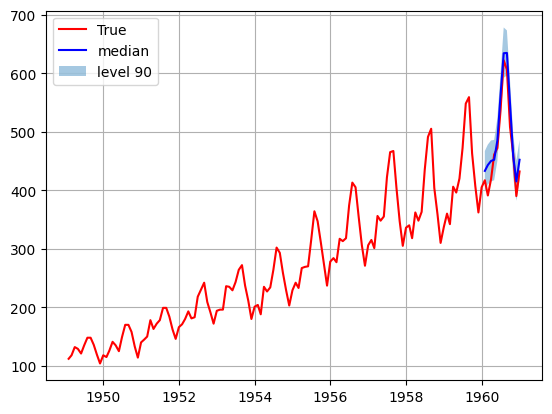

In [21]:
# Plot quantile predictions
plot_df = plot_df[plot_df.unique_id=='Airline1'].drop('unique_id', axis=1)
plt.plot(plot_df['ds'], plot_df['y'], c='red', label='True')
plt.plot(plot_df['ds'], plot_df['NBEATS-median'], c='blue', label='median')
plt.fill_between(x=plot_df['ds'][-12:], 
                 y1=plot_df['NBEATS-lo-90'][-12:].values, 
                 y2=plot_df['NBEATS-hi-90'][-12:].values,
                 alpha=0.4, label='level 90')
plt.grid()
plt.legend()
plt.plot()

In [22]:
Y_hat_df.head()

,NBEATS,NBEATS-median,NBEATS-lo-90,NBEATS-lo-80,NBEATS-hi-80,NBEATS-hi-90
0,432.431000,433.0,396.950012,405.0,459.0,467.0
1,443.500000,443.0,410.000000,417.0,470.0,478.0
2,449.898010,450.0,415.000000,423.0,479.0,485.0
3,452.475006,452.0,416.950012,424.0,479.0,486.0
4,484.932007,485.0,450.000000,457.0,514.0,523.0


In [23]:
Y_test_df.head()

,unique_id,ds,y,trend,y_[lag12]
0,Airline1,1960-01-31,417.0,132,360.0
1,Airline1,1960-02-29,391.0,133,342.0
2,Airline1,1960-03-31,419.0,134,406.0
3,Airline1,1960-04-30,461.0,135,396.0
4,Airline1,1960-05-31,472.0,136,420.0


In [24]:
plot_df = pd.concat([Y_test_df, Y_hat_df], axis=1)
plot_df.head()

,unique_id,ds,y,trend,y_[lag12],NBEATS,NBEATS-median,NBEATS-lo-90,NBEATS-lo-80,NBEATS-hi-80,NBEATS-hi-90
0,Airline1,1960-01-31,417.0,132,360.0,432.431000,433.0,396.950012,405.0,459.0,467.0
1,Airline1,1960-02-29,391.0,133,342.0,443.500000,443.0,410.000000,417.0,470.0,478.0
2,Airline1,1960-03-31,419.0,134,406.0,449.898010,450.0,415.000000,423.0,479.0,485.0
3,Airline1,1960-04-30,461.0,135,396.0,452.475006,452.0,416.950012,424.0,479.0,486.0
4,Airline1,1960-05-31,472.0,136,420.0,484.932007,485.0,450.000000,457.0,514.0,523.0


In [25]:
plot_df = pd.concat([Y_train_df, plot_df])

In [26]:
plot_df.head(30)

,unique_id,ds,y,trend,y_[lag12],NBEATS,NBEATS-median,NBEATS-lo-90,NBEATS-lo-80,NBEATS-hi-80,NBEATS-hi-90
0,Airline1,1949-01-31,112.0,0,112.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Airline1,1949-02-28,118.0,1,118.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Airline1,1949-03-31,132.0,2,132.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Airline1,1949-04-30,129.0,3,129.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Airline1,1949-05-31,121.0,4,121.0,NaN,NaN,NaN,NaN,NaN,NaN
5,Airline1,1949-06-30,135.0,5,135.0,NaN,NaN,NaN,NaN,NaN,NaN
6,Airline1,1949-07-31,148.0,6,148.0,NaN,NaN,NaN,NaN,NaN,NaN
7,Airline1,1949-08-31,148.0,7,148.0,NaN,NaN,NaN,NaN,NaN,NaN
8,Airline1,1949-09-30,136.0,8,136.0,NaN,NaN,NaN,NaN,NaN,NaN
9,Airline1,1949-10-31,119.0,9,119.0,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
Y_train_df.tail()

,unique_id,ds,y,trend,y_[lag12]
271,Airline2,1959-08-31,859.0,271,805.0
272,Airline2,1959-09-30,763.0,272,704.0
273,Airline2,1959-10-31,707.0,273,659.0
274,Airline2,1959-11-30,662.0,274,610.0
275,Airline2,1959-12-31,705.0,275,637.0


In [28]:
plot_df.head()

,unique_id,ds,y,trend,y_[lag12],NBEATS,NBEATS-median,NBEATS-lo-90,NBEATS-lo-80,NBEATS-hi-80,NBEATS-hi-90
0,Airline1,1949-01-31,112.0,0,112.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Airline1,1949-02-28,118.0,1,118.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Airline1,1949-03-31,132.0,2,132.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Airline1,1949-04-30,129.0,3,129.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Airline1,1949-05-31,121.0,4,121.0,NaN,NaN,NaN,NaN,NaN,NaN
